<h1><center>K-Means Clustering</center></h1>

<h2 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h2>

- Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
- Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics.
-  It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. 
- For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. 
- A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

### Loading the package

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing 
from sklearn import model_selection 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Load Data From CSV File  

In [3]:
cust_df = pd.read_csv("./data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
cust_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


<h2 id="pre_processing">Pre-processing</h2

### 1. Remove categorical features:
- As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [5]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### 2. Handling the missing values

In [6]:
df.Defaulted = df.Defaulted.fillna(method="ffill")

### 3. Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [7]:
useful_col = [
            # 'Customer Id', 
            'Age', 
            'Edu',
            'Years Employed',
            'Income',
            'Card Debt',
            'Other Debt',
            'Defaulted',
            'DebtIncomeRatio'
]

In [8]:
X = df[useful_col]

std_scalar = preprocessing.StandardScaler()
X_scaled = std_scalar.fit_transform(X)
X_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.5891249 , -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.5891249 ,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.69743293,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.69743293,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.5891249 , -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.5891249 , -0.2340332 ]])

<h2 id="modeling">Modeling</h2>

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [115]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, max_iter=500)
k_means.fit(X_scaled)

KMeans(max_iter=500, n_clusters=3, n_init=12)

In [116]:
labels = k_means.labels_ # for each data-point KMeans assign a label (0 to n_clusters-1)
print(f"Length of labels: {len(labels)} and Top 25 labels is: {labels[:25]}")

Length of labels: 850 and Top 25 labels is: [2 1 0 2 1 1 2 2 2 1 0 0 2 2 0 0 2 2 1 2 2 2 0 1 1]


<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.

In [117]:
df["cluster_label"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster:
- Mean, Median, Min and Max etc

In [118]:
df.iloc[:, 1:].groupby('cluster_label').agg(["mean", "median"])

Age              Edu        Years Employed         \
                    mean median      mean median           mean median   
cluster_label                                                            
0              31.401070   29.0  1.759358    2.0       4.208556    3.0   
1              43.194805   43.0  1.954545    2.0      16.915584   16.0   
2              33.891945   34.0  1.618861    1.0       7.640472    7.0   

                  Income        Card Debt         Other Debt          \
                    mean median      mean  median       mean  median   
cluster_label                                                          
0              30.770053   27.0  1.408417  1.0190   2.502369  1.8230   
1              99.915584   80.5  4.150078  3.1665   7.922669  6.9495   
2              36.410609   32.0  0.860139  0.6060   1.824996  1.4880   

              Defaulted        DebtIncomeRatio         
                   mean median            mean median  
cluster_label                                          
0              0.989305    1.0       12.969519  12.10  
1              0.220779    0.0       14.043506  13.15  
2              0.000000    0.0        7.972299   6.90

Now, lets look at the distribution of customers based on their age and income:

In [119]:
area = np.pi*(X_scaled[:, 1])**2 # Education is used as marker; higher edu; higher marker size

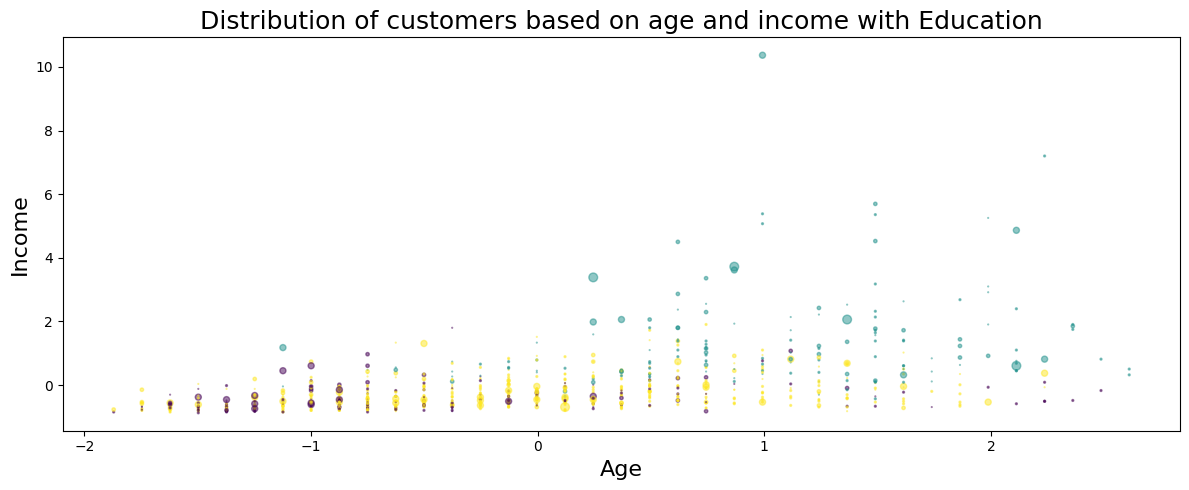

In [120]:
plt.figure(figsize=(12, 5), dpi=100)

# 0th col: Age, 3rd col: Income
# s: The marker size in points**2.
# c: The marker colors
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], s=area, c=labels.astype("int"), alpha=0.5)  
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title("Distribution of customers based on age and income with Education", fontsize=18)
plt.tight_layout()
plt.show()

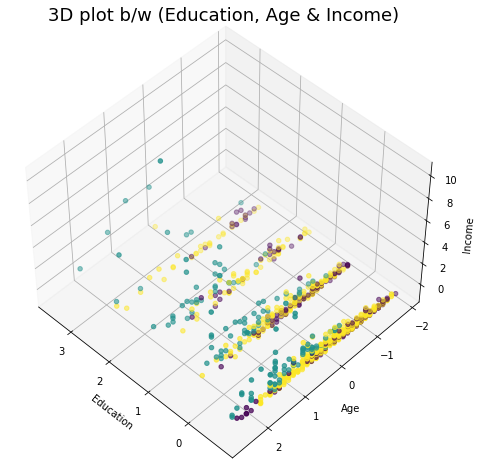

In [125]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.set_title("3D plot b/w (Education, Age & Income)", fontsize=18)

ax.scatter(X_scaled[:, 1], X_scaled[:, 0], X_scaled[:, 3], c= labels.astype("float"))  
plt.show()

### Conclusion:
K-Means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME

---